### Library 

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

### Import Data

In [3]:
data = pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Data PreProsesing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
print(data.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


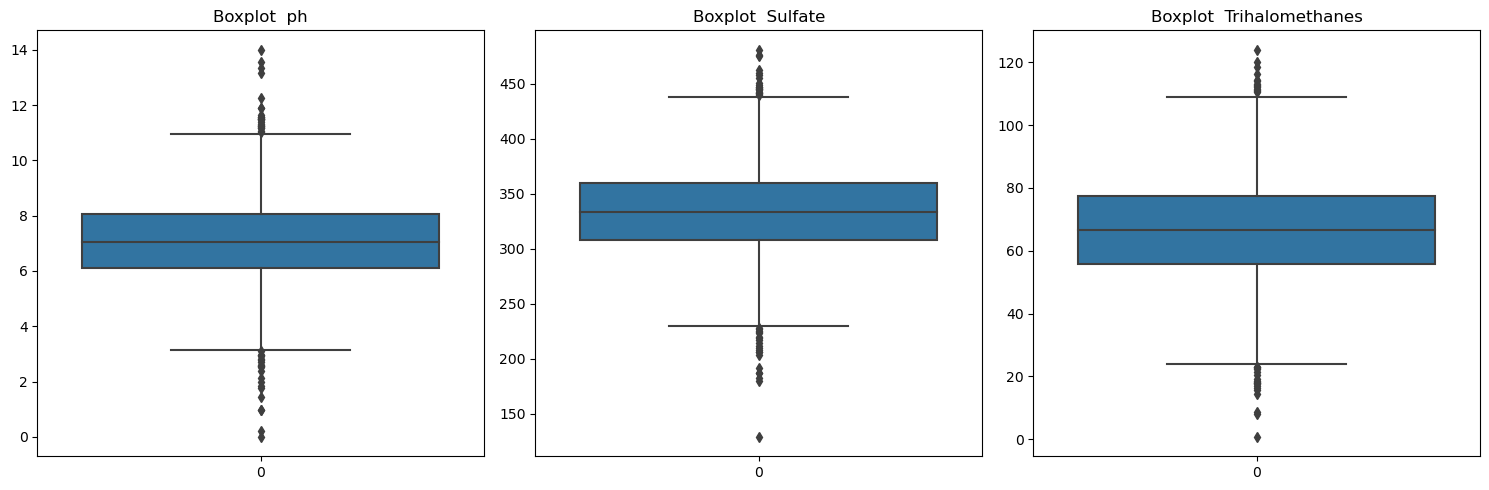

In [8]:
Kolom = ['ph', 'Sulfate', 'Trihalomethanes']
fig, axes = plt.subplots(nrows=1, ncols=len(Kolom), figsize=(15, 5))

for i, feature in enumerate(Kolom):
    sns.boxplot(data=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot  {feature}')

plt.tight_layout()
plt.show()

In [9]:
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

In [10]:
print(data.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [11]:
X = data.drop('Potability',axis = 1)
Y = data['Potability']

In [12]:
jumlah_portability_1 = len(data[data['Potability'] == 1])
print(f"Jumlah data dengan Portability = 1: {jumlah_portability_1}")
jumlah_portability_0 = len(data[data['Potability'] == 0])
print(f"Jumlah data dengan Portability = 0: {jumlah_portability_0}")

Jumlah data dengan Portability = 1: 1278
Jumlah data dengan Portability = 0: 1998


### Resample Data

In [13]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [14]:
class_counts = np.bincount(y_resampled)
print(f'Jumlah data dengan Portability = 0: {class_counts[0]}')
print(f'Jumlah data dengan Portability = 1: {class_counts[1]}')

Jumlah data dengan Portability = 0: 1998
Jumlah data dengan Portability = 1: 1998


### Split Dataset

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3596, 9)
(400, 9)
(3596,)
(400,)


### Normalisasi Data

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model

In [72]:
model = Sequential([
    Dense(units=500, activation='relu', input_dim=9),
    Dropout(0.4),
    Dense(units=500, activation='relu'),
    Dropout(0.4),
    Dense(units=500, activation='relu'),
    Dropout(0.4),
    Dense(units=1, activation='sigmoid')
])
opt = Adam(learning_rate=5e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



### Training Model

In [74]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2558 - accuracy: 0.8940
Epoch 2/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2442 - accuracy: 0.8957
Epoch 3/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2365 - accuracy: 0.9002
Epoch 4/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2408 - accuracy: 0.8974
Epoch 5/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2314 - accuracy: 0.9052
Epoch 6/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2391 - accuracy: 0.8985
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2334 - accuracy: 0.9010
Epoch 8/100
225/225 [==============================] - 1s 6ms/step - loss: 0.2336 - accuracy: 0.8982
Epoch 9/100
225/225 [==============================] - 2s 8ms/step - loss: 0.2299 - accuracy: 0.9029
Epoch 10/100
225/225 [==============================] - 2s 9ms/step - loss: 0.2308 - accura

##  Eksperiment

In [ ]:
'''
##### catatan 1
tadi pake 7e-5 hasil akurasi 70 % 5e-5 juga 70% % 8e -5 masih 70% neuron masih 500 drouput 0.5 3 hidden layer epoch 400 pake adam
batch size 16 akurasi masih 70 batch 32 turun jadi 66 % ini 8e-5
5e-5 batch 16 70% batch 32 hasil 68 %
7e-5 batch 16 70% batch 32 hasil 68 %
batch size 16 selalu 70 % dari 3 kearning rate
nambah 1 hidden layer 500 sama droput 0.5 lr 7e-5 masih 70%
####### catatan 2  epoch jadi 50
pake 1e -3 tanpa dropout hasil 71 % pake 3 hidden layer 500 neuron activation relu batch 16
neuron 600 100 100 droput 20 % learning rate 2e-4 akurasi 67% batch size 16 %
neurom 500 dropout 0.4 optimizer 4e-4 adam epoch 100 batchsize 16 71.75%
neuron 500 dropout 0.4 optimezer adam learning rate 5e-4 70 %
####### catatan 3 learning rate - 5 dropout 0.5 3hidden layer
1e - 5 63 % tidak overfitting
2e - 5 63 % tidak overfitting
3e - 5 62 % tidak overfitting
4e - 5 62 % tidak overfitting
#######5e - 4 69 % tidak overfitting pake median
#######5e - 4 70 % tidak dengan dropout 0.4
5e - 4 64 % tidak dengan dropout 0.4 tanpa resample
5e - 4 69 % tidak overfitting dengan dropout 0.4 resample nambah 1 hidden layer
######5e - 4 72 % tidak overfitting dengan dropout 0.5 resample nambah 1 hidden layer batch size 32
5e - 4 70 % tidak overfitting dengan dropout 0.5 resample nambah 1 hidden layer batch size 64
15e - 4 69 % tidak overfitting dengan dropout 0.5 resample nambah 1 hidden layer batch size 64
#######15e - 4 70 % tidak overfitting dengan dropout 0.5 resample nambah 1 hidden layer batch size 32
15e - 3 50 % dengan dropout 0.5 resample nambah 1 hidden layer batch size 32
15e - 5 64 % dengan dropout 0.5 resample nambah 1 hidden layer batch size 32

'''

### Save Model

In [76]:
model.save('model74.h5')

c:\Users\dhifa\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       205
           1       0.73      0.75      0.74       195

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.74       400
weighted avg       0.75      0.74      0.75       400



#### Hasil Dari Klasifikasi 72 %

In [21]:
loaded_model = load_model('model72.h5')

y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))


13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       205
           1       0.71      0.72      0.71       195

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



### Hasil Klasifikasi 71%

In [22]:
loaded_model = load_model('model71.h5')

y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       205
           1       0.63      0.70      0.66       195

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.66      0.65      0.65       400



### Hasil Klasifikasi 69%

In [23]:
loaded_model = load_model('model1.h5')

y_pred = loaded_model.predict(X_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test, y_pred))

13/13 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       205
           1       0.68      0.68      0.68       195

    accuracy                           0.69       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.69      0.69      0.69       400

